# Coursera Capstone Project - Car Accident Severity

This notebook is for the Capstone Project on Car Accident Severity which is offered by IBM on Coursera.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


# Seattle Accident Data

This project uses the Seattle Accident Data as the dataset to work upon for the prediction of severity of the accident/collision based on the other attributes in the dataset.


#### Importing the dataset

In [ ]:
data = pd.read_csv('Data-Collisions.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [ ]:
data

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194668,2,-122.290826,47.565408,219543,309534,310814,E871089,Matched,Block,NaN,34TH AVE S BETWEEN S DAKOTA ST AND S GENESEE ST,,NaN,2,Injury Collision,Head On,3,0,0,2,2018/11/12 00:00:00+00,11/12/2018 8:12:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,24,From opposite direction - both moving - head-on,0,0,N
194669,1,-122.344526,47.690924,219544,309085,310365,E876731,Matched,Block,NaN,AURORA AVE N BETWEEN N 85TH ST AND N 86TH ST,,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,2018/12/18 00:00:00+00,12/18/2018 9:14:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",Y,N,Raining,Wet,Daylight,NaN,NaN,NaN,13,From same direction - both going straight - bo...,0,0,N
194670,2,-122.306689,47.683047,219545,311280,312640,3809984,Matched,Intersection,24760.0,20TH AVE NE AND NE 75TH ST,,NaN,2,Injury Collision,Left Turn,3,0,0,2,2019/01/19 00:00:00+00,1/19/2019 9:25:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,28,From opposite direction - one left turn - one ...,0,0,N
194671,2,-122.355317,47.678734,219546,309514,310794,3810083,Matched,Intersection,24349.0,GREENWOOD AVE N AND N 68TH ST,,NaN,2,Injury Collision,Cycles,2,0,1,1,2019/01/15 00:00:00+00,1/15/2019 4:48:00 PM,At Intersection (intersection related),51,PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT...,NaN,N,Clear,Dry,Dusk,NaN,NaN,NaN,5,Vehicle Strikes Pedalc

#### Balancing the Imbalanced Dataset - Downsampling

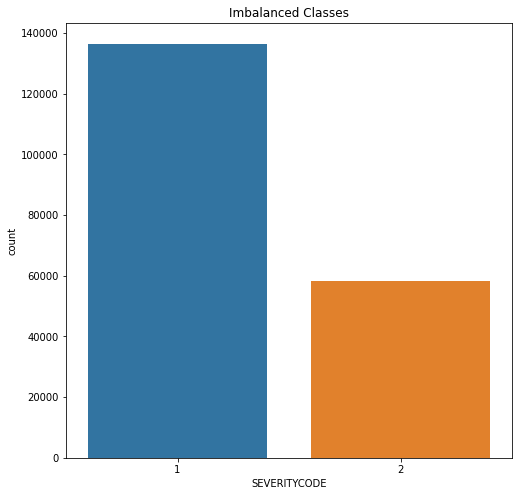

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

plt.figure(figsize=(8, 8))
sns.countplot('SEVERITYCODE', data = data)
plt.title('Imbalanced Classes')
plt.show()

In [ ]:
data['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

It can be seen that the data according to the target classes is highly imbalanced.

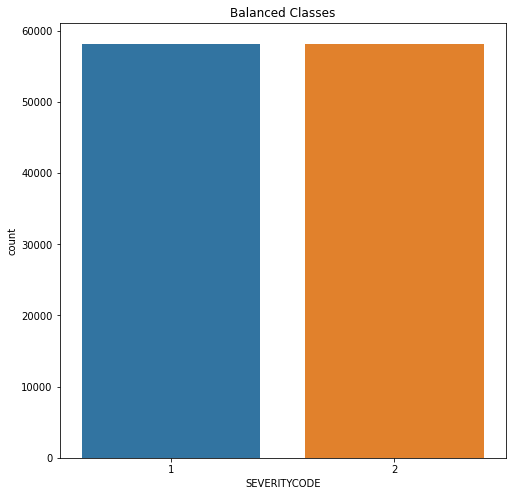

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

shuffled_data = data.sample(frac=1,random_state=4)


class2 = shuffled_data.loc[shuffled_data['SEVERITYCODE'] == 2]
class1 = shuffled_data.loc[shuffled_data['SEVERITYCODE'] == 1].sample(n=58188,random_state=4)

data = pd.concat([class1, class2])

plt.figure(figsize=(8, 8))
sns.countplot('SEVERITYCODE', data = data)
plt.title('Balanced Classes')
plt.show()

#### Separating the Severity labels from the dataset

In [ ]:
labels = pd.DataFrame(data["SEVERITYCODE"])

In [ ]:
labels['SEVERITYCODE'].value_counts()

2    58188
1    58188
Name: SEVERITYCODE, dtype: int64

#### This is a binary class problem i.e. Severity has only 2 values - '1' represents that low severity and '2' represents high severity.
#### The labels of the dataset are now balanced. It is now a balanced dataset.


In [ ]:
data = data.drop(['SEVERITYCODE'],axis = 1)

In [ ]:
data.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
86800,-122.313130,47.661269,95137,109930,109930,3376549,Matched,Intersection,27062.0,UNIVERSITY WAY NE AND NE 45TH ST,NaN,NaN,1,Property Damage Only Collision,Right Turn,2,0,0,2,2010/06/26 00:00:00+00,6/26/2010 1:52:00 PM,At Intersection (intersection related),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,10177008.0,NaN,16,From same direction - one right turn - one str...,0,0,N
181357,-122.346301,47.609994,203813,328295,329795,EA08096,Matched,Intersection,29724.0,ALASKAN WAY AND LENORA ST,,NaN,1,Property Damage Only Collision,Angles,4,0,0,2,2020/01/21 00:00:00+00,1/21/2020 9:16:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
33868,-122.258894,47.506122,38878,52828,52828,2616106,Matched,Block,NaN,S BANGOR ST BETWEEN 59TH AVE S AND 60TH AVE S,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,2006/12/25 00:00:00+00,12/25/2006 11:13:00 PM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Clear,Dry,Daylight,NaN,6359004.0,NaN,32,One parked--one moving,0,0,N
92209,-122.342878,47.609812,101111,116369,116369,3345929,Matched,Block,NaN,WESTERN AVE BETWEEN PINE ST AND VIRGINIA ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,2,0,0,2,2010/05/09 00:00:00+00,5/9/2010 2:00:00 PM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,10129022.0,NaN,32,One parked--one moving,0,0,N
48038,-122.314286,47.661277,53609,68346,68346,2802679,Matched,Intersection,27063.0,BROOKLYN AVE NE AND NE 45TH ST,NaN,NaN,1,Property Damage Only Collision,Angles,5,0,0,3,2007/03/16 00:00:00+00,3/16/2007 10:30:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,1,Clear,Dry,Dark - Street Lights On,NaN,7075025.0,NaN,10,Entering at angle,0,0,N


## Data Preprocessing 

### 1. Data Cleaning 

It can be observed that some of the features have many 'NaN' values which need to be replaced with a meaningful value so as to not lose the feature as a meaningless feature.

#### a. 'Speeding' feature/attribute

In [ ]:
data['SPEEDING'].value_counts()

Y    5925
Name: SPEEDING, dtype: int64

In [ ]:
data['SPEEDING'].fillna("N", inplace = True)

In [ ]:
data['SPEEDING'].value_counts()

N    110451
Y      5925
Name: SPEEDING, dtype: int64

'Y' represents that Speeding was a factor in the collision while 'N' represents that Speeding was not a factor.

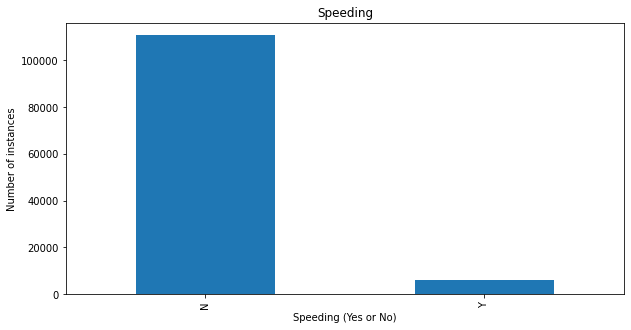

In [ ]:
data['SPEEDING'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Speeding')
plt.ylabel('Number of instances')
plt.xlabel('Speeding (Yes or No)');

#### b. Road Condition 'ROADCOND' Feature

In [ ]:
data['ROADCOND'].value_counts()

Dry               76177
Wet               29186
Unknown            6881
Ice                 660
Snow/Slush          513
Other                84
Standing Water       71
Sand/Mud/Dirt        45
Oil                  43
Name: ROADCOND, dtype: int64

In [ ]:
data['ROADCOND'].fillna("Unknown", inplace = True)

In [ ]:
data['ROADCOND'].value_counts()

Dry               76177
Wet               29186
Unknown            9597
Ice                 660
Snow/Slush          513
Other                84
Standing Water       71
Sand/Mud/Dirt        45
Oil                  43
Name: ROADCOND, dtype: int64

Replacing 'NaN' values with 'Unknown' as value in 'ROADCOND' attribute.

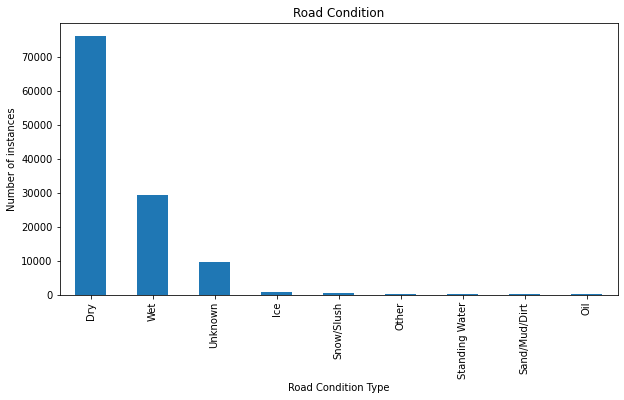

In [ ]:
data['ROADCOND'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Road Condition')
plt.ylabel('Number of instances')
plt.xlabel('Road Condition Type');

#### c. Lighting Condition ('LIGHTCOND') Feature

In [ ]:
data['LIGHTCOND'].value_counts()

Daylight                    71727
Dark - Street Lights On     28909
Unknown                      6063
Dusk                         3648
Dawn                         1529
Dark - No Street Lights       853
Dark - Street Lights Off      703
Other                         135
Dark - Unknown Lighting         6
Name: LIGHTCOND, dtype: int64

In [ ]:
data['LIGHTCOND'].isnull().values.any()

True

In [ ]:
data['LIGHTCOND'].fillna("Unknown", inplace = True)

In [ ]:
data['LIGHTCOND'].value_counts()

Daylight                    71727
Dark - Street Lights On     28909
Unknown                      8866
Dusk                         3648
Dawn                         1529
Dark - No Street Lights       853
Dark - Street Lights Off      703
Other                         135
Dark - Unknown Lighting         6
Name: LIGHTCOND, dtype: int64

Replacing 'NaN' values with 'Unknown' as value in 'LIGHTCOND' attribute.

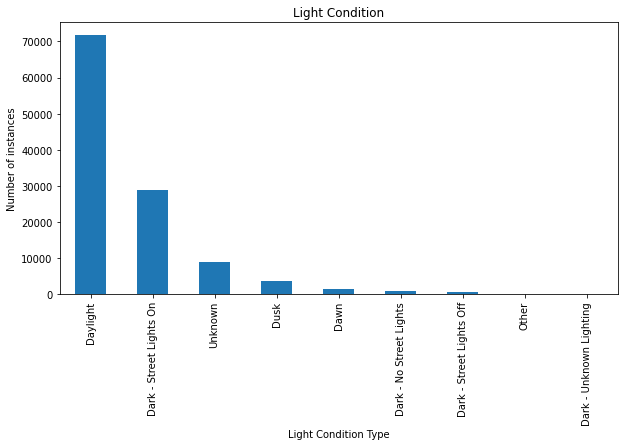

In [ ]:
data['LIGHTCOND'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Light Condition')
plt.ylabel('Number of instances')
plt.xlabel('Light Condition Type');

#### d. Weather ('WEATHER') Feature

In [ ]:
data['WEATHER'].value_counts()

Clear                       68018
Raining                     20457
Overcast                    16863
Unknown                      6885
Snowing                       469
Other                         445
Fog/Smog/Smoke                358
Sleet/Hail/Freezing Rain       60
Blowing Sand/Dirt              41
Severe Crosswind               11
Partly Cloudy                   4
Name: WEATHER, dtype: int64

In [ ]:
data['WEATHER'].isnull().values.any()

True

In [ ]:
data['WEATHER'].fillna("Unknown", inplace = True)

In [ ]:
data['WEATHER'].value_counts()

Clear                       68018
Raining                     20457
Overcast                    16863
Unknown                      9650
Snowing                       469
Other                         445
Fog/Smog/Smoke                358
Sleet/Hail/Freezing Rain       60
Blowing Sand/Dirt              41
Severe Crosswind               11
Partly Cloudy                   4
Name: WEATHER, dtype: int64

Replacing 'NaN' values with 'Unknown' as value in 'WEATHER' attribute.

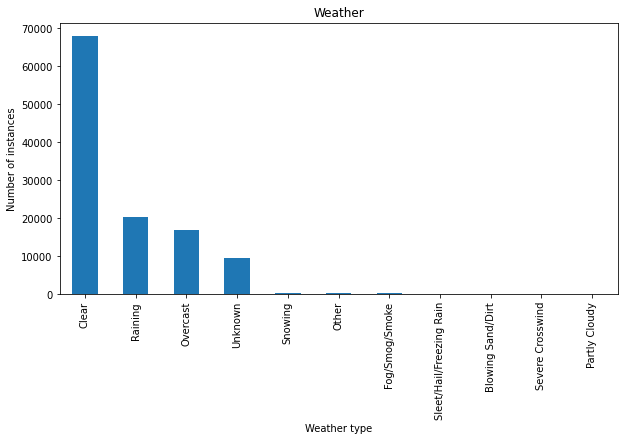

In [ ]:
data['WEATHER'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Weather')
plt.ylabel('Number of instances')
plt.xlabel('Weather type');

#### e. Location Feature

In [ ]:
data['LOCATION']

86800                     UNIVERSITY WAY NE AND NE 45TH ST
181357                           ALASKAN WAY AND LENORA ST
33868        S BANGOR ST BETWEEN 59TH AVE S AND 60TH AVE S
92209          WESTERN AVE BETWEEN PINE ST AND VIRGINIA ST
48038                       BROOKLYN AVE NE AND NE 45TH ST
                                ...                       
9603          DENNY WAY BETWEEN WESTLAKE AVE AND TERRY AVE
73706     GLENWILDE PL E BETWEEN E ROANOKE ST AND DEAD END
138284                         WOODLAND PL N AND N 65TH ST
107442           BOREN AVE BETWEEN SPRING ST AND SENECA ST
73575                            8TH AVE NE AND NE 65TH ST
Name: LOCATION, Length: 116376, dtype: object

In [ ]:
data['LOCATION'].isnull().sum()

1272

In [ ]:
data['LOCATION'].fillna("Unknown", inplace = True)

In [ ]:
data['LOCATION'].value_counts()

Unknown                                                           1272
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                     185
6TH AVE AND JAMES ST                                               174
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB     173
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N           166
                                                                  ... 
31ST AVE AND E CHERRY ST                                             1
11TH AVE NE BETWEEN NE 123RD ST AND NE 125TH ST                      1
NE 143RD ST BETWEEN 17TH AVE NE AND 19TH AVE NE                      1
54TH AVE S AND S GRATTAN W ST                                        1
21ST AVE SW AND 21ST AVE SW TURN RD                                  1
Name: LOCATION, Length: 19859, dtype: int64

Replacing 'NaN' values with 'Unknown' in 'LOCATION' attribute.

#### f. Junction type ('JUNCTIONTYPE') Feature

In [ ]:
data['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              49447
At Intersection (intersection related)               42508
Mid-Block (but intersection related)                 13840
Driveway Junction                                     6378
At Intersection (but not related to intersection)     1239
Ramp Junction                                           97
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64

In [ ]:
data['JUNCTIONTYPE'].isnull().sum()

2862

In [ ]:
data['JUNCTIONTYPE'].fillna("Other", inplace = True)

In [ ]:
data['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              49447
At Intersection (intersection related)               42508
Mid-Block (but intersection related)                 13840
Driveway Junction                                     6378
Other                                                 2862
At Intersection (but not related to intersection)     1239
Ramp Junction                                           97
Unknown                                                  5
Name: JUNCTIONTYPE, dtype: int64

Replacing 'NaN' values with 'Other' as value.

#### g. Num. of People Involved ('PERSONCOUNT') Feature

In [ ]:
data['PERSONCOUNT']

86800     2
181357    4
33868     2
92209     2
48038     5
         ..
9603      7
73706     3
138284    2
107442    3
73575     2
Name: PERSONCOUNT, Length: 116376, dtype: int64

In [ ]:
data['PERSONCOUNT'].isnull().sum()

0

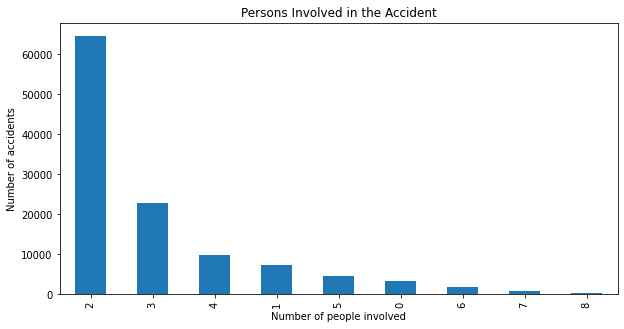

In [ ]:
data['PERSONCOUNT'].value_counts().nlargest(9).plot(kind='bar', figsize=(10,5))
plt.title('Persons Involved in the Accident')
plt.ylabel('Number of accidents')
plt.xlabel('Number of people involved');

#### h. Num. of vehicles involved ('VEHCOUNT') Feature

In [ ]:
data['VEHCOUNT']

86800     2
181357    2
33868     2
92209     2
48038     3
         ..
9603      5
73706     1
138284    2
107442    2
73575     1
Name: VEHCOUNT, Length: 116376, dtype: int64

In [ ]:
data['VEHCOUNT'].isnull().sum()

0

#### i. Inattention Index ('INATTENTIONIND') Feature 

If 'Y' - Collision/Accident due to inattention
If 'N' - Collision not due to inattention

In [ ]:
data['INATTENTIONIND']

86800     NaN
181357    NaN
33868     NaN
92209     NaN
48038     NaN
         ... 
9603      NaN
73706     NaN
138284    NaN
107442    NaN
73575     NaN
Name: INATTENTIONIND, Length: 116376, dtype: object

In [ ]:
data['INATTENTIONIND'].isnull().sum()

97590

In [ ]:
data['INATTENTIONIND'].fillna("N", inplace = True)

In [ ]:
data['INATTENTIONIND'].value_counts()

N    97590
Y    18786
Name: INATTENTIONIND, dtype: int64

Replaced 'NaN' values or blank by 'N' to represent inattention feature.

#### j. Address Type ('ADDRTYPE') Feature

In [ ]:
data['ADDRTYPE'].value_counts()

Block           71262
Intersection    43842
Alley             348
Name: ADDRTYPE, dtype: int64

In [ ]:
data['ADDRTYPE'].isnull().sum()

924

In [ ]:
data['ADDRTYPE'].fillna("Other", inplace = True)

In [ ]:
data['ADDRTYPE'].value_counts()

Block           71262
Intersection    43842
Other             924
Alley             348
Name: ADDRTYPE, dtype: int64

### Selecting useful columns from the data for the ML Severity prediction problem

In [ ]:
data = data.filter(['ROADCOND','LIGHTCOND','WEATHER','SPEEDING','LOCATION','JUNCTIONTYPE','ADDRTYPE','VEHCOUNT','PERSONCOUNT','INATTENTIONIND'])

In [ ]:
data

,ROADCOND,LIGHTCOND,WEATHER,SPEEDING,LOCATION,JUNCTIONTYPE,ADDRTYPE,VEHCOUNT,PERSONCOUNT,INATTENTIONIND
86800,Dry,Daylight,Clear,N,UNIVERSITY WAY NE AND NE 45TH ST,At Intersection (intersection related),Intersection,2,2,N
181357,Wet,Daylight,Overcast,N,ALASKAN WAY AND LENORA ST,At Intersection (intersection related),Intersection,2,4,N
33868,Dry,Daylight,Clear,N,S BANGOR ST BETWEEN 59TH AVE S AND 60TH AVE S,Mid-Block (not related to intersection),Block,2,2,N
92209,Dry,Daylight,Clear,N,WESTERN AVE BETWEEN PINE ST AND VIRGINIA ST,Mid-Block (not related to intersection),Block,2,2,N
48038,Dry,Dark - Street Lights On,Clear,N,BROOKLYN AVE NE AND NE 45TH ST,At Intersection (intersection related),Intersection,3,5,N
...,...,...,...,...,...,...,...,...,...,...
9603,Dry,Daylight,Clear,N,DENNY WAY BETWEEN WESTLAKE AVE AND TERRY AVE,Mid-Block (not related to intersection),Block,5,7,N
73706,Dry,Daylight,Clear,N,GLENWILDE PL E BETWEEN E ROANOKE ST AND DEAD END,Driveway Junction,Block,1,3,N
138284,Wet,Dark - Street Lights On,Unknown,N,WOODLAND PL N AND N 65TH ST,At Intersection (intersection related),Intersection,2,2,N
107442,Dry,Daylight,Clear,N,BOREN AVE BETWEEN SPRING ST AND SENECA ST,Mid-Block (but intersection related),Block,2,3,N


### 2. Data Preparation - Encoding string and categorical features as labels

#### a. Location Feature

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder_location = label_encoder.fit(data['LOCATION'])
label_encoded_location = label_encoder.transform(data['LOCATION'])

In [ ]:
data['LOCATION'] = label_encoded_location

#### b. Junction Type Feature

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder_junction = label_encoder.fit(data['JUNCTIONTYPE'])
label_encoded_junction = label_encoder.transform(data['JUNCTIONTYPE'])

In [ ]:
data['JUNCTIONTYPE'] = label_encoded_junction

#### c. Light Conditon Feature

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder_lightcond = label_encoder.fit(data['LIGHTCOND'])
label_encoded_lightcond = label_encoder.transform(data['LIGHTCOND'])

In [ ]:
data['LIGHTCOND'] = label_encoded_lightcond

#### d. Road Condition Feature 

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder_roadcond = label_encoder.fit(data['ROADCOND'])
label_encoded_roadcond = label_encoder.transform(data['ROADCOND'])

In [ ]:
data['ROADCOND'] = label_encoded_roadcond

#### e. Weather feature

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder_weather = label_encoder.fit(data['WEATHER'])
label_encoded_weather = label_encoder.transform(data['WEATHER'])

In [ ]:
data['WEATHER'] = label_encoded_weather

#### f. Speeding feature

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder_speeding = label_encoder.fit(data['SPEEDING'])
label_encoded_speeding = label_encoder.transform(data['SPEEDING'])

data['SPEEDING'] = label_encoded_speeding

#### g. Inattention Index feature

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder_inatt = label_encoder.fit(data['INATTENTIONIND'])
label_encoded_inatt = label_encoder.transform(data['INATTENTIONIND'])

data['INATTENTIONIND'] = label_encoded_inatt

#### h. Address Type Feature

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder_addr = label_encoder.fit(data['ADDRTYPE'])
label_encoded_addr = label_encoder.transform(data['ADDRTYPE'])

data['ADDRTYPE'] = label_encoded_inatt

## Final Processed Data 

In [ ]:
data

,ROADCOND,LIGHTCOND,WEATHER,SPEEDING,LOCATION,JUNCTIONTYPE,ADDRTYPE,VEHCOUNT,PERSONCOUNT,INATTENTIONIND
86800,0,5,1,0,18973,1,0,2,2,0
181357,8,5,4,0,8413,1,0,2,4,0
33868,0,5,1,0,16517,4,0,2,2,0
92209,0,5,1,0,19617,4,0,2,2,0
48038,0,2,1,0,9472,1,0,3,5,0
...,...,...,...,...,...,...,...,...,...,...
9603,0,5,1,0,10145,4,0,5,7,0
73706,0,5,1,0,11700,2,0,1,3,0
138284,8,2,10,0,19760,1,0,2,2,0
107442,0,5,1,0,9249,3,0,2,3,0


In [ ]:
cols = data.columns

In [ ]:
cols

Index(['ROADCOND', 'LIGHTCOND', 'WEATHER', 'SPEEDING', 'LOCATION',
       'JUNCTIONTYPE', 'ADDRTYPE', 'VEHCOUNT', 'PERSONCOUNT',
       'INATTENTIONIND'],
      dtype='object')

#### As it can be seen from the above cell that the data has been converted to numerical form and is now fit to be fed into a classifier for prediction of severity of accident.

**Data Normalization**

In [ ]:
from sklearn import preprocessing
data = preprocessing.MinMaxScaler().fit_transform(data)

In [ ]:
data = pd.DataFrame(data,columns=cols)

**Checking for correlation**

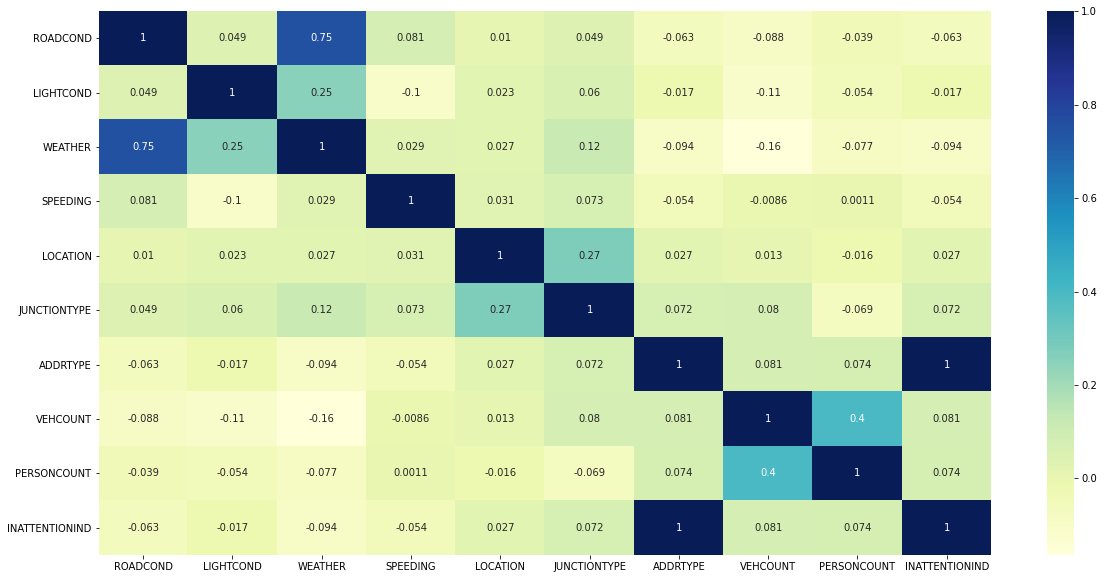

In [ ]:
plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c,cmap="YlGnBu",annot=True)

There is a significant correlation between Weather and Road Condition features observable in the heatmap.

## Train-Test split of data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data,labels['SEVERITYCODE'], test_size = 0.33, stratify = labels,  random_state = 45)

In [ ]:
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test  :  ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test  :  ", y_test.shape)

Shape of X_train :  (77971, 10)
Shape of X_test  :   (38405, 10)
Shape of y_train :  (77971,)
Shape of y_test  :   (38405,)


## Modeling 

In [ ]:
from sklearn.model_selection import GridSearchCV

**K-Nearest Neighbor Classier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Hyperparameter Tuning - Finding best 'k' or 'n_neigbors' and 'leaf_size' using GridSearchCV

In [ ]:
hyperparameters = {'leaf_size' : [25,30,35], 
                   'n_neighbors' : [15,20,25,30] 
                   }

In [ ]:
classifier = GridSearchCV(KNeighborsClassifier(), hyperparameters)
classifier.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [25, 30, 35],
                         'n_neighbors': [15, 20, 25, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
classifier.best_params_

{'leaf_size': 25, 'n_neighbors': 25}

In [ ]:
classifier = KNeighborsClassifier(leaf_size = 25, n_neighbors = 25)

In [ ]:
Knn_classifier = classifier.fit(X_train,y_train)

**Decision Tree Classifier**

Hyperparameter Tuning 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
hyperparameters = {"max_depth": [6,7,8,9,10],
                   "max_features": [5,6,7,8,9],
              "criterion": ["gini", "entropy"]}

In [ ]:
classifier = GridSearchCV(DecisionTreeClassifier(), hyperparameters)
classifier.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [ ]:
classifier.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 8}

In [ ]:
classfier = DecisionTreeClassifier(criterion = 'gini', max_depth =  8, max_features = 8)

In [ ]:
DTClassifier = classifier.fit(X_train,y_train)

**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
hyperparameters = {'n_estimators': [200,300,400],
                   'max_depth': [3,4,5]}

In [ ]:
classifier = GridSearchCV(RandomForestClassifier(max_features = 5), hyperparameters)
classifier.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=5,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_

In [ ]:
classifier.best_params_

{'max_depth': 5, 'n_estimators': 400}

In [ ]:
classfier = RandomForestClassifier(max_depth = 5, max_features = 5, n_estimators = 400)

In [ ]:
RFClassifier = classifier.fit(X_train, y_train)

# Evaluation

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score, f1_score

KNN Classifier

In [ ]:
y_pred = Knn_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.64      0.63      0.64     19202
           2       0.64      0.65      0.64     19203

    accuracy                           0.64     38405
   macro avg       0.64      0.64      0.64     38405
weighted avg       0.64      0.64      0.64     38405



In [ ]:
print(f1_score(y_test,y_pred))

0.6365501999579036


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[12097  7105]
 [ 6709 12494]]


**Decision Tree Classifier**

In [ ]:
y_pred = DTClassifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.60      0.64     19202
           2       0.65      0.72      0.68     19203

    accuracy                           0.66     38405
   macro avg       0.67      0.66      0.66     38405
weighted avg       0.67      0.66      0.66     38405



In [ ]:
print(f1_score(y_test,y_pred))

0.6428789096046762


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[11603  7599]
 [ 5292 13911]]


**Random Forest Classifier**

In [ ]:
y_pred = RFClassifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.69      0.58      0.63     19202
           2       0.64      0.74      0.69     19203

    accuracy                           0.66     38405
   macro avg       0.67      0.66      0.66     38405
weighted avg       0.67      0.66      0.66     38405



In [ ]:
print(f1_score(y_test,y_pred))

0.6309763355533513


In [ ]:
print(confusion_matrix(y_test,y_pred))

[[11132  8070]
 [ 4951 14252]]


## Results

In [ ]:
from tabulate import tabulate

In [ ]:
table = [["K-Nearest Neighbors",0.64,0.64,0.63,0.64],["Decision Tree",0.66,0.69,0.60,0.64],
          ["Random Forest",0.66,0.69,0.58,0.63]]
headers = ["Classifier", "Accuracy", "Precision", "Recall", "F1Score"]
print("Results: ")
print(tabulate(table, headers,tablefmt="pretty"))


Results: 
+---------------------+----------+-----------+--------+---------+
|     Classifier      | Accuracy | Precision | Recall | F1Score |
+---------------------+----------+-----------+--------+---------+
| K-Nearest Neighbors |   0.64   |   0.64    |  0.63  |  0.64   |
|    Decision Tree    |   0.66   |   0.69    |  0.6   |  0.64   |
|    Random Forest    |   0.66   |   0.69    |  0.58  |  0.63   |
+---------------------+----------+-----------+--------+---------+
